# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

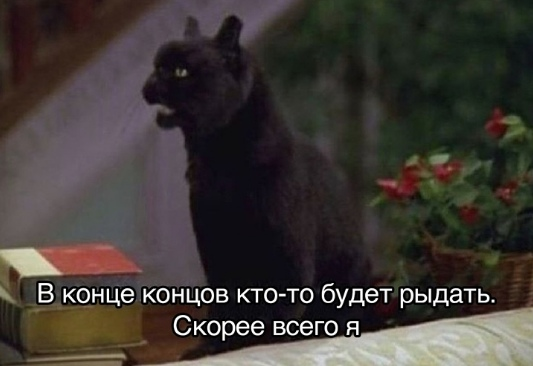

Ну, погнали!

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')
 
import warnings
warnings.filterwarnings('ignore')  #поддерживаю!!!
 
%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [226]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [227]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

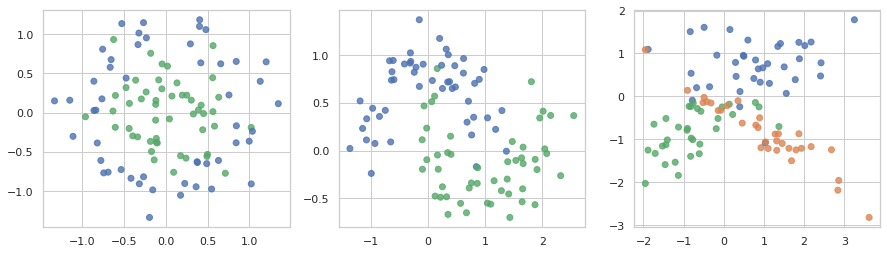

In [228]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [229]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

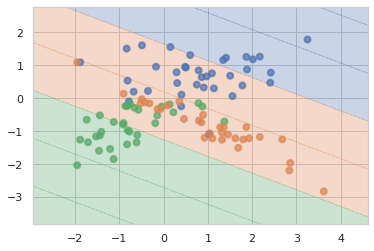

In [230]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [231]:
from sklearn.metrics import accuracy_score

(Отсюда и немного далее будут стремные подписи осей. Это не совсем то, что нужно, но я не знаю, как их еще назвать. Да и вообще там тут важен паттерн плоскости, а не значения по осям, так что да. Я предупредила.)

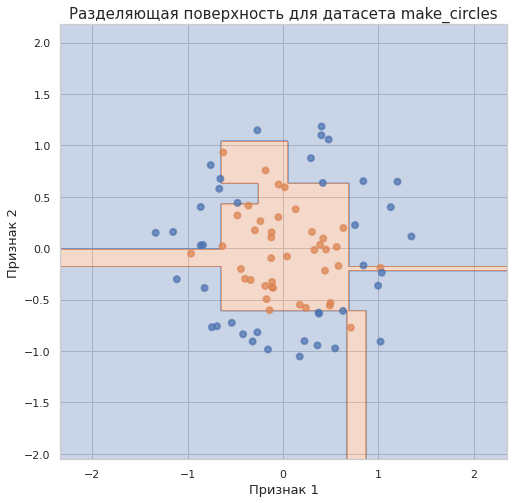

In [232]:
X_1, y_1 = datasets[0]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y_1)
m_1 = DecisionTreeClassifier()
m_1.fit(X_train_1, y_train_1)

plt.figure(figsize=(8, 8))
plot_surface(m_1, X_train_1, y_train_1)
plt.xlabel('Признак 1', size=13)
plt.ylabel('Признак 2', size=13)
plt.title('Разделяющая поверхность для датасета make_circles', size=15)
plt.show()

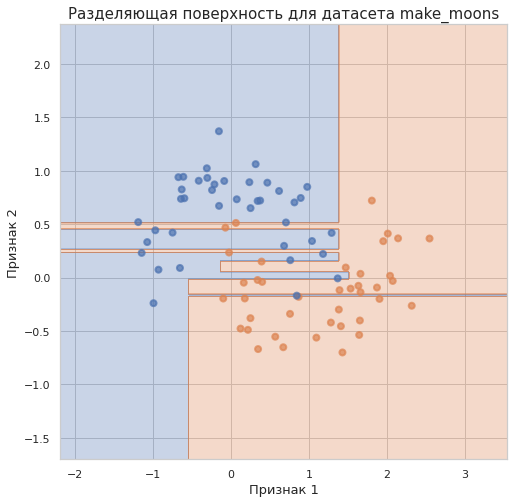

In [233]:
X_2, y_2 = datasets[1]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)
m_2 = DecisionTreeClassifier()
m_2.fit(X_train_2, y_train_2)

plt.figure(figsize=(8, 8))
plot_surface(m_2, X_train_2, y_train_2)
plt.xlabel('Признак 1', size=13)
plt.ylabel('Признак 2', size=13)
plt.title('Разделяющая поверхность для датасета make_moons', size=15)
plt.show()

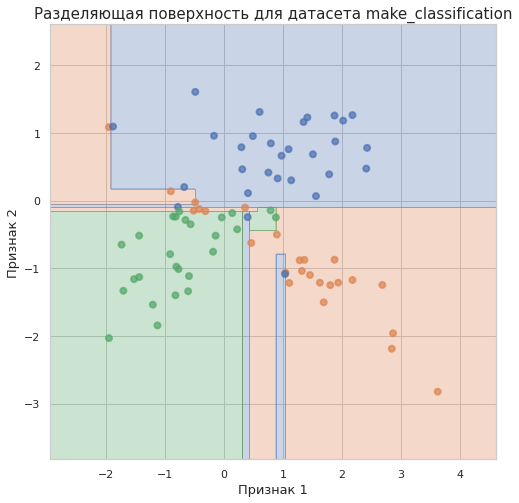

In [234]:
X_3, y_3 = datasets[2]
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42, stratify=y_3)
m_3 = DecisionTreeClassifier()
m_3.fit(X_train_3, y_train_3)

plt.figure(figsize=(8, 8))
plot_surface(m_3, X_train_3, y_train_3)
plt.xlabel('Признак 1', size=13)
plt.ylabel('Признак 2', size=13)
plt.title('Разделяющая поверхность для датасета make_classification', size=15)
plt.show()

In [235]:
y_tr_pred_1 = m_1.predict(X_train_1)
y_tr_pred_2 = m_2.predict(X_train_2)
y_tr_pred_3 = m_3.predict(X_train_3)
y_te_pred_1 = m_1.predict(X_test_1)
y_te_pred_2 = m_2.predict(X_test_2)
y_te_pred_3 = m_3.predict(X_test_3)

print('Значение accuracy на обучающей выборке для датасета make_circles = %.4f' % accuracy_score(y_train_1, y_tr_pred_1))
print('Значение accuracy на тестовой выборке для датасета make_circles = %.4f' % accuracy_score(y_test_1, y_te_pred_1))
print()
print('Значение accuracy на обучающей выборке для датасета make_moons = %.4f' % accuracy_score(y_train_2, y_tr_pred_2))
print('Значение accuracy на тестовой выборке для датасета make_moons = %.4f' % accuracy_score(y_test_2, y_te_pred_2))
print()
print('Значение accuracy на обучающей выборке для датасета make_classification = %.4f' % accuracy_score(y_train_3, y_tr_pred_3))
print('Значение accuracy на тестовой выборке для датасета make_classification = %.4f' % accuracy_score(y_test_3, y_te_pred_3))

Значение accuracy на обучающей выборке для датасета make_circles = 1.0000
Значение accuracy на тестовой выборке для датасета make_circles = 0.7000

Значение accuracy на обучающей выборке для датасета make_moons = 1.0000
Значение accuracy на тестовой выборке для датасета make_moons = 0.9000

Значение accuracy на обучающей выборке для датасета make_classification = 1.0000
Значение accuracy на тестовой выборке для датасета make_classification = 0.7500


Ну, как мы можем видеть, хуже всего у нас результаты на датасетах make_circles и make_classification. Не знаю, что понимать под "сильно", но как мне кажется, значение accuracy = 0,7 - это весьма неплохо. Так что скажу, что модели переобучились не очень сильно. На датасете make_moons все вообще супер!

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

(Как обычно прикапываюсь к формулировкам)
"Несколько" звучит как "штук 5". Так что так и сделаю :)

In [236]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Для min_samples_leaf = 1 и max_depth = 3 значение accuracy на обучающей выборке для датасета make_circles = 0.8875
Для min_samples_leaf = 1 и max_depth = 3 значение accuracy на тестовой выборке для датасета make_circles = 0.7000
Для min_samples_leaf = 1 и max_depth = 4 значение accuracy на обучающей выборке для датасета make_circles = 0.9500
Для min_samples_leaf = 1 и max_depth = 4 значение accuracy на тестовой выборке для датасета make_circles = 0.8500
Для min_samples_leaf = 1 и max_depth = 5 значение accuracy на обучающей выборке для датасета make_circles = 0.9750
Для min_samples_leaf = 1 и max_depth = 5 значение accuracy на тестовой выборке для датасета make_circles = 0.6500
Для min_samples_leaf = 1 и max_depth = 6 значение accuracy на обучающей выборке для датасета make_circles = 1.0000
Для min_samples_leaf = 1 и max_depth = 6 значение accuracy на тестовой выборке для датасета make_circles = 0.7000
Для min_samples_leaf = 2 и max_depth = 3 значение accuracy на обучающей выборке для 

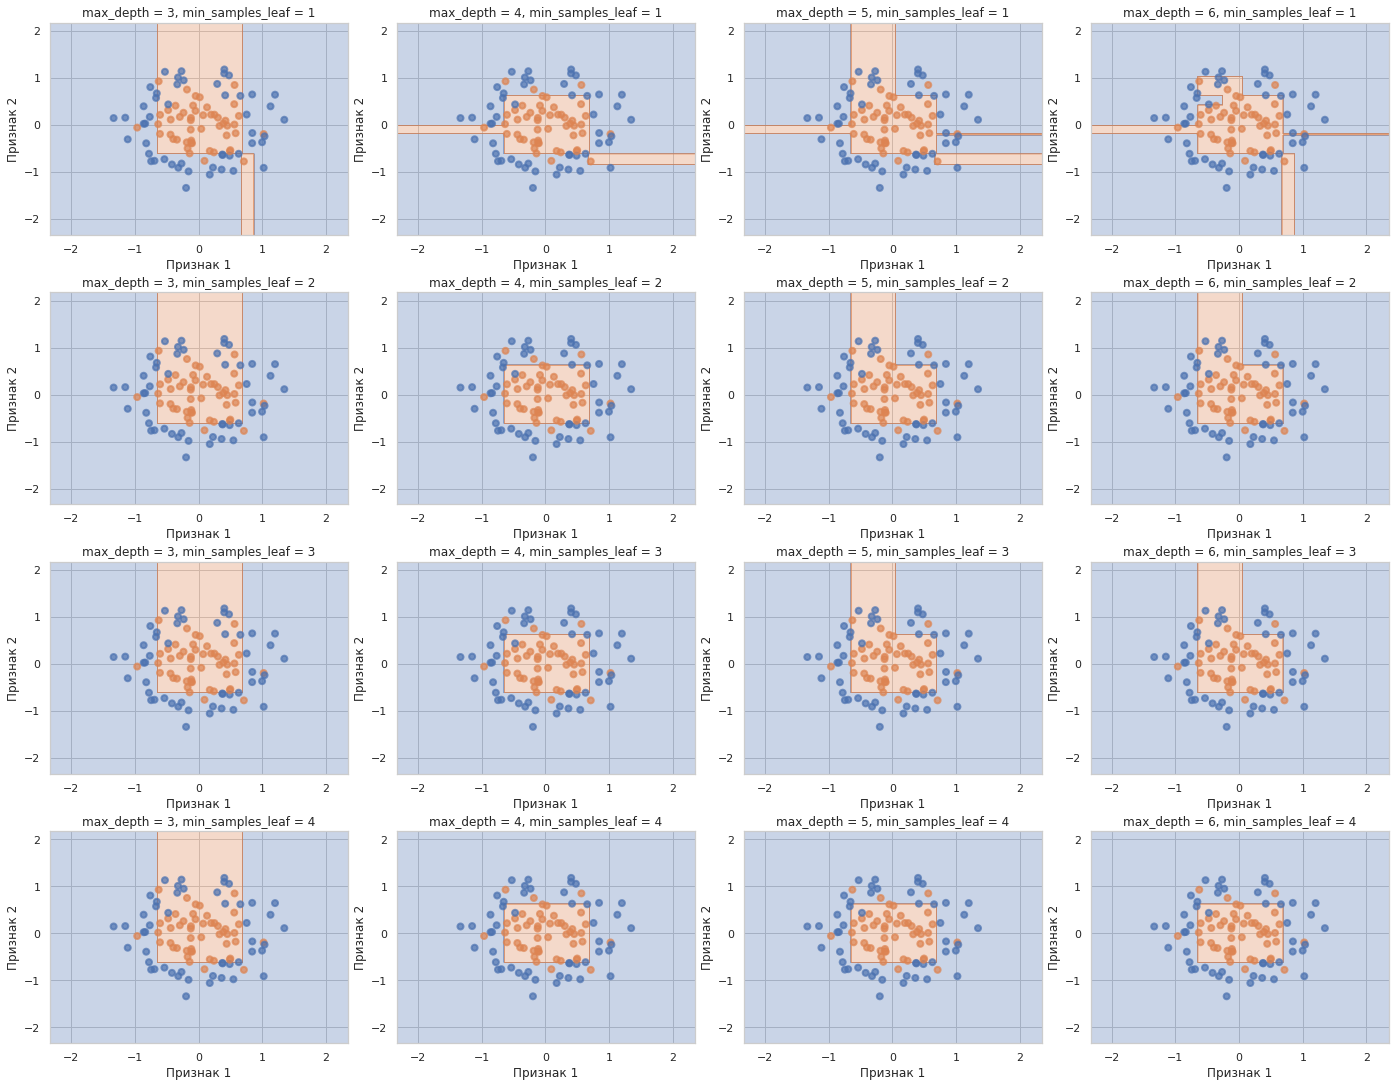

In [237]:
s_l = np.arange(1, 5)
m_d = np.arange(3, 7)

total_axes = len(s_l) * len(m_d)
sp = 1   
plt.figure(figsize=(20, 60))
for l in s_l:
    for d in m_d:
        m = DecisionTreeClassifier(min_samples_leaf=l, max_depth=d)
        m.fit(X_train, y_train)
        plt.subplot(total_axes, 4, sp, title='max_depth = %d, min_samples_leaf = %d' % (d, l), xlabel='Признак 1', ylabel='Признак 2')
        plot_surface(m, X, y)
        y_tr_pred = m.predict(X_train)
        y_te_pred = m.predict(X_test)
        sp += 1
        print('Для min_samples_leaf =', l, 'и max_depth =', d, 'значение accuracy на обучающей выборке для датасета make_circles = %.4f' % accuracy_score(y_train, y_tr_pred))
        print('Для min_samples_leaf =', l, 'и max_depth =', d, 'значение accuracy на тестовой выборке для датасета make_circles = %.4f' % accuracy_score(y_test, y_te_pred))

Как мы можем заметить, при увеличении максимальной глубины дерева наша модель начинает все больше и больше подгоняться к обучающим данным, таким образом растет переобучение. Происходит так очевидно потому что чем больше максимальная глубина дерева, тем больше раз алгоритм сможет разбить множество => разделяющее множество получится более детальным (или как это назвать, имею ввиду, что будет больше мелких частей и т.д.) и подогнаным под исходные данные.Также можем заметить, что при увеличении min_samples_leaf наоборот снижается подгонка модели под данные.
Соответсвенно и с минимальным количеством объектов в листе. Чем это число меньше, тем больше модель подгоняется под данные и наоборот.

In [238]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Для min_samples_leaf = 1 и max_depth = 3 значение accuracy на обучающей выборке для датасета make_circles = 0.9250
Для min_samples_leaf = 1 и max_depth = 3 значение accuracy на тестовой выборке для датасета make_circles = 0.8500
Для min_samples_leaf = 1 и max_depth = 4 значение accuracy на обучающей выборке для датасета make_circles = 0.9625
Для min_samples_leaf = 1 и max_depth = 4 значение accuracy на тестовой выборке для датасета make_circles = 0.8500
Для min_samples_leaf = 1 и max_depth = 5 значение accuracy на обучающей выборке для датасета make_circles = 0.9750
Для min_samples_leaf = 1 и max_depth = 5 значение accuracy на тестовой выборке для датасета make_circles = 0.8500
Для min_samples_leaf = 1 и max_depth = 6 значение accuracy на обучающей выборке для датасета make_circles = 0.9875
Для min_samples_leaf = 1 и max_depth = 6 значение accuracy на тестовой выборке для датасета make_circles = 0.8500
Для min_samples_leaf = 2 и max_depth = 3 значение accuracy на обучающей выборке для 

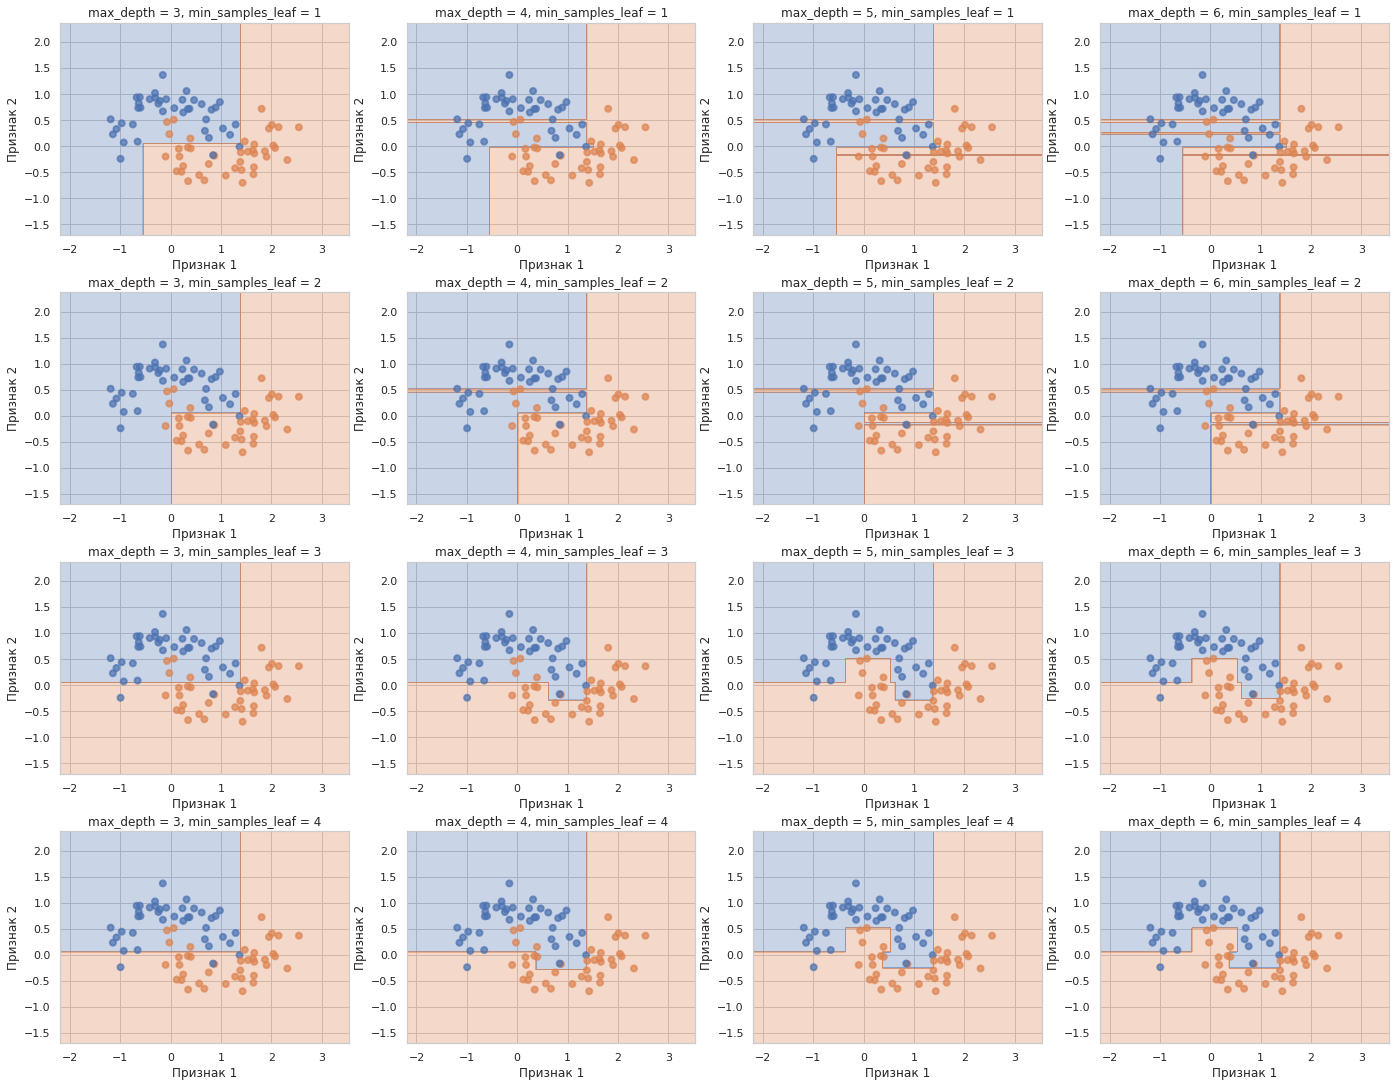

In [239]:
sp = 1   
plt.figure(figsize=(20, 60))
for l in s_l:
    for d in m_d:
        m = DecisionTreeClassifier(min_samples_leaf=l, max_depth=d)
        m.fit(X_train, y_train)
        plt.subplot(total_axes, 4, sp, title='max_depth = %d, min_samples_leaf = %d' % (d, l), xlabel='Признак 1', ylabel='Признак 2')
        plot_surface(m, X_train, y_train)
        y_tr_pred = m.predict(X_train)
        y_te_pred = m.predict(X_test)
        sp += 1
        print('Для min_samples_leaf =', l, 'и max_depth =', d, 'значение accuracy на обучающей выборке для датасета make_circles = %.4f' % accuracy_score(y_train, y_tr_pred))
        print('Для min_samples_leaf =', l, 'и max_depth =', d, 'значение accuracy на тестовой выборке для датасета make_circles = %.4f' % accuracy_score(y_test, y_te_pred))

Как можно заметить, ситуация повторяется.

In [240]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Для min_samples_leaf = 1 и max_depth = 3 значение accuracy на обучающей выборке для датасета make_circles = 0.9250
Для min_samples_leaf = 1 и max_depth = 3 значение accuracy на тестовой выборке для датасета make_circles = 0.6500
Для min_samples_leaf = 1 и max_depth = 4 значение accuracy на обучающей выборке для датасета make_circles = 0.9625
Для min_samples_leaf = 1 и max_depth = 4 значение accuracy на тестовой выборке для датасета make_circles = 0.6500
Для min_samples_leaf = 1 и max_depth = 5 значение accuracy на обучающей выборке для датасета make_circles = 0.9875
Для min_samples_leaf = 1 и max_depth = 5 значение accuracy на тестовой выборке для датасета make_circles = 0.7500
Для min_samples_leaf = 1 и max_depth = 6 значение accuracy на обучающей выборке для датасета make_circles = 1.0000
Для min_samples_leaf = 1 и max_depth = 6 значение accuracy на тестовой выборке для датасета make_circles = 0.6500
Для min_samples_leaf = 2 и max_depth = 3 значение accuracy на обучающей выборке для 

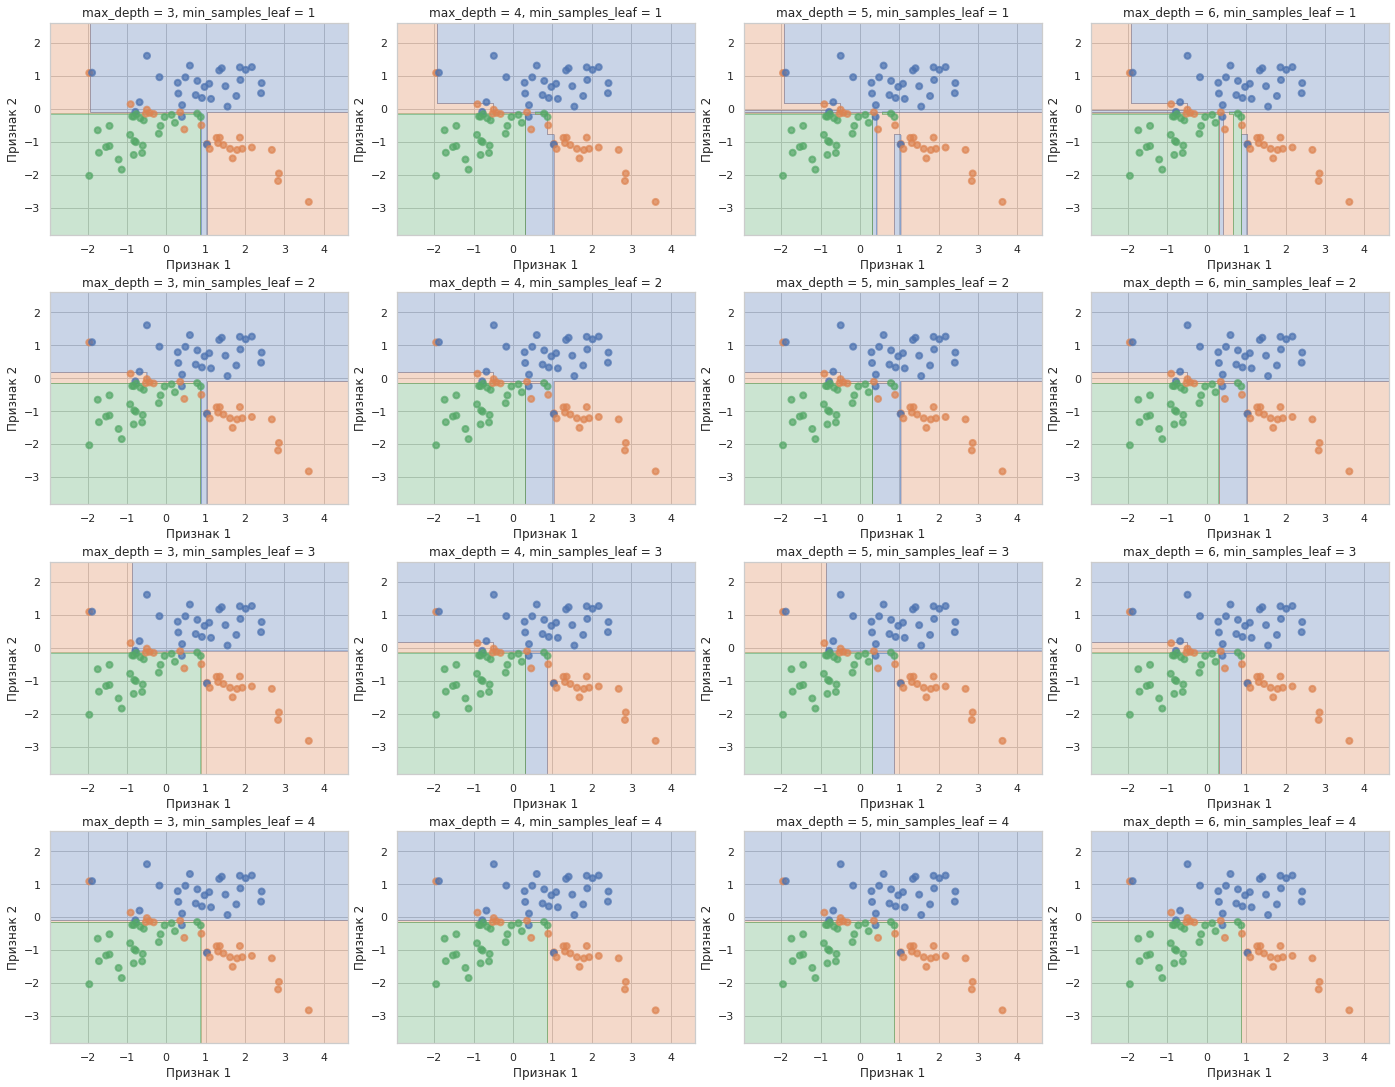

In [241]:
sp = 1   
plt.figure(figsize=(20, 60))
for l in s_l:
    for d in m_d:
        m = DecisionTreeClassifier(min_samples_leaf=l, max_depth=d)
        m.fit(X_train, y_train)
        plt.subplot(total_axes, 4, sp, title='max_depth = %d, min_samples_leaf = %d' % (d, l), xlabel='Признак 1', ylabel='Признак 2')
        plot_surface(m, X_train, y_train)
        y_tr_pred = m.predict(X_train)
        y_te_pred = m.predict(X_test)
        sp += 1
        print('Для min_samples_leaf =', l, 'и max_depth =', d, 'значение accuracy на обучающей выборке для датасета make_circles = %.4f' % accuracy_score(y_train, y_tr_pred))
        print('Для min_samples_leaf =', l, 'и max_depth =', d, 'значение accuracy на тестовой выборке для датасета make_circles = %.4f' % accuracy_score(y_test, y_te_pred))


__Ответ:__ В целом, то что я писала выше - правда для всех датасетов. Можно заметить (и также убедиться, посмотрев на accuracy), что самые переобученная модель выходит при min_samples_leaf = 1 и max_depth = 6 (т.е. при минимальном и максимальном значении соответсвующих параметров в нашем случае)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

dianasusla  

https://contest.yandex.ru/contest/21899/run-report/41549271/

Мне очень хочется работать в коллабе, так что снова извиняюсь за куски кода(

In [242]:
def find_best_split(feature_vector, target_vector):
    sort_ind = np.argsort(feature_vector)
    sorted_target = target_vector[sort_ind]
    sorted_feature = np.sort(feature_vector)
    uniq_f = (sorted_feature[:-1] != sorted_feature[1:])

    thresholds = 0.5 * (sorted_feature[:-1][uniq_f] + sorted_feature[1:][uniq_f])

    l_0 = np.cumsum(1 - sorted_target[:-1])  #количество нулей в левом поддереве для каждого порога
    l_1 = np.cumsum(sorted_target[:-1])  #количество единиц в левом поддереве для каждого порога
    #теперь для правого поддерева проходимся с конца
    r_0 = np.cumsum(1 - sorted_target[-1:0:-1])[-1::-1]  #количество нулей в правом поддереве для каждого порога
    r_1 = np.cumsum(sorted_target[-1:0:-1])[-1::-1]   #количество единиц в правом поддереве для каждого порога

    p_0_l = l_0 / (l_0 + l_1)  #тут по формуле
    p_1_l = 1 - p_0_l
    p_0_r = r_0 / (r_0 + r_1)
    p_1_r = 1 - p_0_r

    H_l = 1 - np.square(p_1_l) - np.square(p_0_l)  #у тут тоже по формуле
    H_r = 1 - np.square(p_1_r) - np.square(p_0_r)

    len_l = np.arange(1, len(target_vector))
    len_r = len(target_vector) - len_l

    ginis = - np.array(len_l / len(target_vector) * H_l) - np.array(len_r / len(target_vector) * H_r)  #я не знаю, почему, но без преобразования они нормально не складывались...
    #хэштег "не костыль, а вынужденная мера"
    #неосуждайте
    ginis = ginis[uniq_f]
    
    gini_best = np.max(ginis)
    b_ind = np.argmax(ginis)
    threshold_best = thresholds[b_ind]

    return thresholds, ginis, threshold_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [243]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [244]:
df = pd.read_csv('/content/gdrive/My Drive/students.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [245]:
ths = []
gns = []
for col in df.columns[:-1]:
    ths.append(find_best_split(df[col], df[' UNS'])[0])
    gns.append(find_best_split(df[col], df[' UNS'])[1])

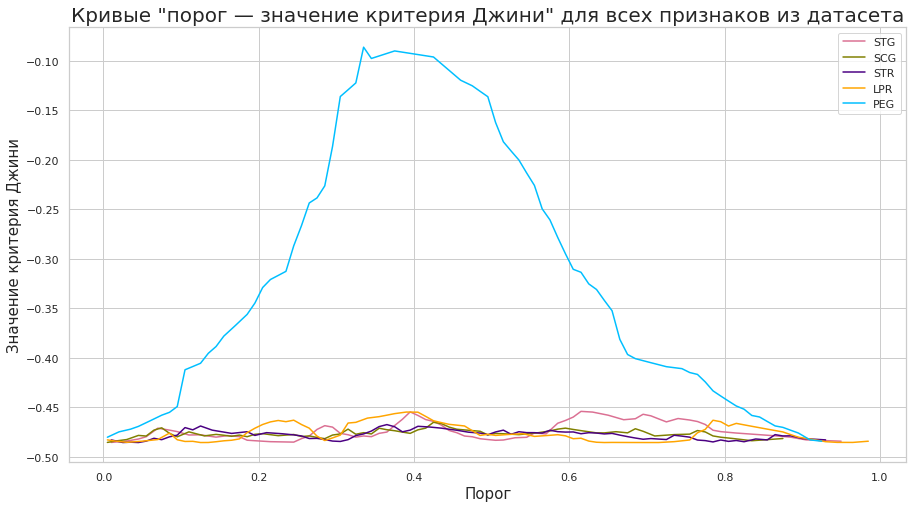

In [246]:
labels = df.columns[:-1]
colors = ['palevioletred', 'olive', 'indigo', 'orange', 'deepskyblue']

plt.figure(figsize=(15, 8))
for i in range(len(labels)):
    plt.plot(ths[i], gns[i], label=labels[i], c=colors[i])
 
plt.xlabel('Порог', size=15)
plt.ylabel('Значение критерия Джини', size=15)
plt.title('Кривые "порог — значение критерия Джини" для всех признаков из датасета', size=20)
 
plt.legend()
plt.show()

Вау, похоже на правду!

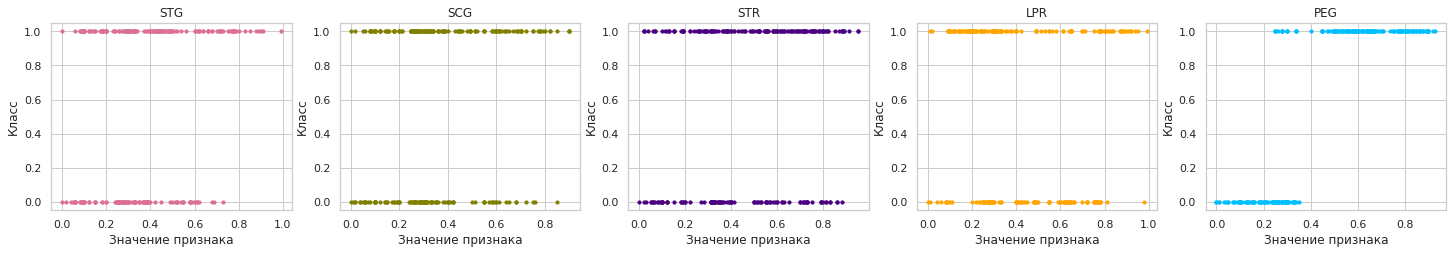

In [247]:
sp = 1
plt.figure(figsize=(25, 20))
for el in df.columns[:-1]:
    plt.subplot(5, 5, sp)
    plt.scatter(df[el], df[' UNS'], c=colors[sp - 1], s=10)
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    plt.title('%s' % (el))
    sp += 1

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** (О боже, теор вопрос на 0.5, какой ужас :с)

Ну, как можно заметить, делить стоит по признаку "PEG". Именно на нем значения критерия Джини набольшие (чего мы и хотим добиться). И также мы можем заметить, что в данном случае значение критерия Джини не "скачет", а сначала постепенно увеличивается, а потом идет на спад. Что говорит о том, что как раз для признакак PEG существует оптимальный порог - при приближении к которому значение критерия Джини возрастает, а при удалении от него значение критерия Джини убывает. Что как раз и явялется нормальной ситуацией. 

Да, с визиуальной оценкой scatter plot результаты полностью согласуются. Как мы можем видеть на графике для признакак PEG. При значении признака от 0 до 0,4 почти все объекты имеют класс "0", а при значении от 0,4 до 1 - класс "1". Таким образом существует порог, при котором выборка явялется практически линейно разделимой. Что нам и нужно. 

Про вид кривой уже писала выше. Кривая для хороших признаков имеет один пик и в целом выглядит почти как перевернутая парабола (у меня плохо с геометрий, но вы поняли, о чем я...) А вот кривая для плохих признаков не имеет ярко выраженных пиков. Еее значения просто постоянно колеблятся в каком-то инервале (в нашем случае этот интервал еще и на очень плохих значениях критерия Джини).

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

dianasusla

https://contest.yandex.ru/contest/21899/run-report/41561085/

In [248]:
from sklearn.base import BaseEstimator
from collections import Counter

In [249]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type") 
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]): #было != (1)
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]): #было range(1, sub_X.shape[1]) (2)
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count #было current_count / current_click (3)

                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                #было list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1]))) (4)
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature]))) 
                #было np.array(map(lambda x: categories_map[x], sub_X[:, feature]))  (5)
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1:  #было len(feature_vector) == 3 (6)
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical": #щас бы опечатки в названиях оставлять... 
                #было "Categorical" (7)
                    threshold_best = list(map(lambda x: x[0], filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] #было (1) (8)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"]) #было sub_y[split]  (9)
            
    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['class']
        else:
            if self._feature_types[node['feature_split']] == 'categorical':
                if x[node['feature_split']] in node['categories_split']:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])   
            else:
                if x[node['feature_split']] < node['threshold']:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])    

    def fit(self, X, y):
        self._fit_node(np.array(X), np.array(y), self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [250]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
data = pd.read_table('agaricus-lepiota.data', sep=',')

--2020-11-17 22:28:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [application/x-httpd-php]
Saving to: ‘agaricus-lepiota.data.2’

agaricus-lepiota.da 100%[===================>] 364.95K  1.37MB/s    in 0.3s    

2020-11-17 22:28:13 (1.37 MB/s) - ‘agaricus-lepiota.data.2’ saved [373704/373704]



In [251]:
data

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


Блин, ну щас бы табличку без названий столбцов давать...
Ну, как считалось, так считалось. Думаю, от потери одного объекта мы не умрем, а костылить не очень хочется.

upd: табличкИ

In [252]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [253]:
X = data.drop(columns='p')
data.p = (data.p == 'p')
y = data['p']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

X_train = X_train.apply(LabelEncoder().fit_transform).values
X_test = X_test.apply(LabelEncoder().fit_transform).values

In [254]:
f_types = ["categorical"] * len(X.columns)
t = DecisionTree(feature_types = f_types)
t.fit(X_train, y_train)
y_pred = t.predict(X_test)
print('Значение accuracy на тестовой выборке = %.4f' % accuracy_score(y_test, y_pred))

Значение accuracy на тестовой выборке = 1.0000


Слава богу...

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [255]:
print('плак :c ' * 10)

плак :c плак :c плак :c плак :c плак :c плак :c плак :c плак :c плак :c плак :c 


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [256]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [257]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

--2020-11-17 22:28:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [application/x-httpd-php]
Saving to: ‘agaricus-lepiota.data.3’

agaricus-lepiota.da 100%[===================>] 364.95K  1.12MB/s    in 0.3s    

2020-11-17 22:28:14 (1.12 MB/s) - ‘agaricus-lepiota.data.3’ saved [373704/373704]



In [258]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data

--2020-11-17 22:28:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25866 (25K) [application/x-httpd-php]
Saving to: ‘tic-tac-toe.data.1’

tic-tac-toe.data.1  100%[===================>]  25.26K  --.-KB/s    in 0.07s   

2020-11-17 22:28:14 (387 KB/s) - ‘tic-tac-toe.data.1’ saved [25866/25866]



In [259]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2020-11-17 22:28:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data.1’

car.data.1          100%[===================>]  50.65K  --.-KB/s    in 0.1s    

2020-11-17 22:28:15 (391 KB/s) - ‘car.data.1’ saved [51867/51867]



In [260]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data

--2020-11-17 22:28:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1059371 (1.0M) [application/x-httpd-php]
Saving to: ‘nursery.data.1’

nursery.data.1      100%[===================>]   1.01M  2.63MB/s    in 0.4s    

2020-11-17 22:28:15 (2.63 MB/s) - ‘nursery.data.1’ saved [1059371/1059371]



In [261]:
mushrooms = pd.read_table('agaricus-lepiota.data', sep=',')
tic_tac_toe = pd.read_table('tic-tac-toe.data', sep=',')
cars = pd.read_table('car.data', sep=',')
nursery = pd.read_table('nursery.data', sep=',')

Теперь сделаем предобработку данных

In [262]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [263]:
mushrooms.p = (mushrooms.p == 'p')
tic_tac_toe.positive = (tic_tac_toe.positive == 'positive')
cars.unacc = ((cars.unacc == 'good') | (cars.unacc == 'vood'))
nursery.recommend = ((nursery.recommend == 'very_recom') | (nursery.recommend == 'priority') | (nursery.recommend == 'spec_prior'))

In [264]:
results = pd.DataFrame(columns=['DT real', 'DT categorical', 'DT one-hot','DTC'], index=['mushrooms', 'tic_tac_toe', 'cars', 'nursery'])
results

,DT real,DT categorical,DT one-hot,DTC
mushrooms,NaN,NaN,NaN,NaN
tic_tac_toe,NaN,NaN,NaN,NaN
cars,NaN,NaN,NaN,NaN
nursery,NaN,NaN,NaN,NaN


In [265]:
mushrooms_x = mushrooms.drop(columns='p')
mushrooms_y = mushrooms['p']

tic_tac_toe_x = tic_tac_toe.drop(columns='positive')
tic_tac_toe_y = tic_tac_toe['positive']

cars_x = cars.drop(columns='unacc')
cars_y = cars['unacc']

nursery_x = nursery.drop(columns='recommend')
nursery_y = nursery['recommend']

In [266]:
mushrooms_x_1 = mushrooms_x.apply(LabelEncoder().fit_transform)
tic_tac_toe_x_1 = tic_tac_toe_x.apply(LabelEncoder().fit_transform)
cars_x_1 = cars_x.apply(LabelEncoder().fit_transform)
nursery_x_1 = nursery_x.apply(LabelEncoder().fit_transform)

m_type = ["real"] * len(mushrooms_x_1.columns)
t_type = ["real"] * len(tic_tac_toe_x_1.columns)
c_type = ["real"] * len(cars_x_1.columns)
n_type = ["real"] * len(nursery_x_1.columns)

t_m = DecisionTree(m_type)
clf_m = make_pipeline(t_m)

t_t = DecisionTree(t_type)
clf_t = make_pipeline(t_t)

t_c = DecisionTree(c_type)
clf_c = make_pipeline(t_c)

t_n = DecisionTree(n_type)
clf_n = make_pipeline(t_n)

In [267]:
results.loc['mushrooms', 'DT real']= np.mean(cross_val_score(clf_m, mushrooms_x_1.values, mushrooms_y, cv=10, scoring='accuracy'))
results.loc['tic_tac_toe', 'DT real']= np.mean(cross_val_score(clf_t, tic_tac_toe_x_1.values, tic_tac_toe_y, cv=10, scoring='accuracy'))
results.loc['cars', 'DT real'] = np.mean(cross_val_score(clf_c, cars_x_1.values, cars_y, cv=10, scoring='accuracy'))
results.loc['nursery', 'DT real'] = np.mean(cross_val_score(clf_n, nursery_x_1.values, nursery_y, cv=10, scoring='accuracy'))

In [268]:
mushrooms_x_2 = mushrooms_x.apply(LabelEncoder().fit_transform)
tic_tac_toe_x_2 = tic_tac_toe_x.apply(LabelEncoder().fit_transform)
cars_x_2 = cars_x.apply(LabelEncoder().fit_transform)
nursery_x_2 = nursery_x.apply(LabelEncoder().fit_transform)

m_type = ["categorical"] * len(mushrooms_x_2.columns)
t_type = ["categorical"] * len(tic_tac_toe_x_2.columns)
c_type = ["categorical"] * len(cars_x_2.columns)
n_type = ["categorical"] * len(nursery_x_2.columns)

t_m = DecisionTree(m_type)
clf_m = make_pipeline(t_m)

t_t = DecisionTree(t_type)
clf_t = make_pipeline(t_t)

t_c = DecisionTree(c_type)
clf_c = make_pipeline(t_c)

t_n = DecisionTree(n_type)
clf_n = make_pipeline(t_n)

In [269]:
results.loc['mushrooms', 'DT categorical']= np.mean(cross_val_score(clf_m, mushrooms_x_2.values, mushrooms_y, cv=10, scoring='accuracy'))
results.loc['tic_tac_toe', 'DT categorical']= np.mean(cross_val_score(clf_t, tic_tac_toe_x_2.values, tic_tac_toe_y, cv=10, scoring='accuracy'))
results.loc['cars', 'DT categorical'] = np.mean(cross_val_score(clf_c, cars_x_2.values, cars_y, cv=10, scoring='accuracy'))
results.loc['nursery', 'DT categorical'] = np.mean(cross_val_score(clf_n, nursery_x_2.values, nursery_y, cv=10, scoring='accuracy'))

In [270]:
mushrooms_x_3 = mushrooms_x.apply(LabelEncoder().fit_transform)
tic_tac_toe_x_3 = tic_tac_toe_x.apply(LabelEncoder().fit_transform)
cars_x_3 = cars_x.apply(LabelEncoder().fit_transform)
nursery_x_3 = nursery_x.apply(LabelEncoder().fit_transform)

In [271]:
column_transformer_m = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), mushrooms_x_3.columns)],
    remainder='passthrough')

t_mushrooms_x_3 = column_transformer_m.fit_transform(mushrooms_x_3)

column_transformer_t = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), tic_tac_toe_x_3.columns)],
    remainder='passthrough')

t_tic_tac_toe_x_3 = column_transformer_t.fit_transform(tic_tac_toe_x_3)

column_transformer_c = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), cars_x_3.columns)],
    remainder='passthrough')

t_cars_x_3 = column_transformer_c.fit_transform(cars_x_3)

column_transformer_n = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), nursery_x_3.columns)],
    remainder='passthrough')

t_nursery_x_3 = column_transformer_n.fit_transform(nursery_x_3)

In [272]:
m_type = ["real"] * column_transformer_m.transform(mushrooms_x_3).shape[1]
t_type = ["real"] * column_transformer_t.transform(tic_tac_toe_x_3).shape[1]
c_type = ["real"] * column_transformer_c.transform(cars_x_3).shape[1]
n_type = ["real"] * column_transformer_n.transform(nursery_x_3).shape[1]

t_m = DecisionTree(m_type)
clf_m = make_pipeline(t_m)

t_t = DecisionTree(t_type)
clf_t = make_pipeline(t_t)

t_c = DecisionTree(c_type)
clf_c = make_pipeline(t_c)

t_n = DecisionTree(n_type)
clf_n = make_pipeline(t_n)

In [273]:
results.loc['mushrooms', 'DT one-hot']= np.mean(cross_val_score(clf_m, t_mushrooms_x_3, mushrooms_y, cv=10, scoring='accuracy'))
results.loc['tic_tac_toe', 'DT one-hot']= np.mean(cross_val_score(clf_t, t_tic_tac_toe_x_3, tic_tac_toe_y, cv=10, scoring='accuracy'))
results.loc['cars', 'DT one-hot'] = np.mean(cross_val_score(clf_c, t_cars_x_3, cars_y, cv=10, scoring='accuracy'))
results.loc['nursery', 'DT one-hot'] = np.mean(cross_val_score(clf_n, t_nursery_x_3, nursery_y, cv=10, scoring='accuracy'))

In [274]:
mushrooms_x_4 = mushrooms_x.apply(LabelEncoder().fit_transform)
tic_tac_toe_x_4 = tic_tac_toe_x.apply(LabelEncoder().fit_transform)
cars_x_4 = cars_x.apply(LabelEncoder().fit_transform)
nursery_x_4 = nursery_x.apply(LabelEncoder().fit_transform)

In [275]:
results.loc['mushrooms', 'DTC']= np.mean(cross_val_score(DecisionTreeClassifier(), mushrooms_x_4, mushrooms_y, cv=10, scoring='accuracy'))
results.loc['tic_tac_toe', 'DTC']= np.mean(cross_val_score(DecisionTreeClassifier(), tic_tac_toe_x_4, tic_tac_toe_y, cv=10, scoring='accuracy'))
results.loc['cars', 'DTC'] = np.mean(cross_val_score(DecisionTreeClassifier(), cars_x_4, cars_y, cv=10, scoring='accuracy'))
results.loc['nursery', 'DTC'] = np.mean(cross_val_score(DecisionTreeClassifier(), nursery_x_4, nursery_y, cv=10, scoring='accuracy'))

In [276]:
results

,DT real,DT categorical,DT one-hot,DTC
mushrooms,0.999261,1,0.999631,0.95829
tic_tac_toe,0.462697,0.548213,0.552467,0.786107
cars,0.930444,0.944922,0.941955,0.85896
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Ну во первых, хочется сказать, что наилучшее значение accuracy в среднем на четырех алгоритмах вышло у датасета nursery, а наихудшее у tic_tac_toe. Кажется, что низкое значение accuracy для датасета tic_tac_toe вполне объяснимо как минимум тем, что обучающая выборка является не до конца репрезентативной. В данном случае наш датасет представляет собой множество различных комбинаций в игре крестики и нолики. Таким образом находясь в конкретной игровой ситуации (на конкретном объекте из выборке) алгоритму сложно угадать верное значение таргета, так как в обучающей выборке либо находится такой же объект с каким-то значением таргета (и тогда алгоритм выдаст вероятнее такой же ответ и ошибется), либо вообще нет идентичных объектов (оба попали в тестовую выборку) и тогда алгоритм может принимать решение только отталкиваясь от "похожих" объектов. Что тоже не делает ситуацию проще. Ну и в целом интуитивно ясно, что какую-то комбинацию в игре крестики-нолики сложно определить по каким-то другим комбинациям. В общем, классификатору сложновато работать с эти датасетом, определенно...

(Не уверена, что я нормально объяснила то, что имела в виду, но да)

Еще можно сразу объяснить то, почему на датасете nursery всегда такие высокие результаты - помимо таргета в нем есть столбец, практически дублирующий таргет (предпоследний), таким образом модель может под него подогнаться.

Про ранжирование алгоритмов. Нет, на разных наборах данных алгоритмы ранжируются по-разному. 

Таким образом для датасета mushrooms алгоритмы (по возрастанию accuracy) идут в таком порядке:

DT categorical, DT one-hot, DT real, DTC

Для tic_tac_toe:

DTC, DT one-hot, DT categorical, DT real

Для cars:

DT categorical, DT one-hot, DT real, DTC

Для nursery:

DT categorical, DT real / DTC, DT one-hot,

Как можно заметить, на датасетах mushrooms и nursery наше решающее дерево показывает примерно такие же результаты как дерево из sklearn, тогда как на датасете tic_tac_toe accuracy больше, а на датасете cars наоборот меньше. 

Также можно заметить, что для датасетов cars и mushrooms ранжирование алгоритмов идентично. 

В целом то, что ранжирование разное - вполне объяснимо. В разных датасетах признаки абсолютно разные и отвечают за разные вещи. Какие-то признаки явлются категориальными, соответственно с ними лучше работать как с категориальными, где-то числовыми или порядковым. Поэтому на каких-то датасетах лучше работает один алгоритм, а на каких-то другой. И тому подобное.

Если честно, не очень понимаю, что от нас хотят во 2 пункте, а в беседе на этот вопрос не ответили (а я слишком социофобна, чтобы задавать вопросы в лс :) ), так что напишу то, что считаю уместным.

Как уже было сказано составителем этого дз выше (пункт 2) - дерево очень сильно зависит от небольших изменений обучающей выборки. Таким образом случайность может заключатся в разбиении выборки на train, test. Так как выборка разбивается случайным образом, значит и дерево строится исходя из этой "случайности" (минутка философии). 

В нашем случае на кросс-валидации использовались выборки с фиксированным random_state и стратификация, так что мы смогли корректно сравнить результаты разных моделей. 

Насчет того, как можно повлиять на случайность и улучшить работу алгоритма. Ну, так как на работу дерева влияет разбиение выборки, то можно, например, сгенерировать много разных обучающих выборок, обучить на них модели и проверять качество на отложенной выборке (которая , очевидно, будет одинакова для всех моделей).

Такие вот дела...



Вставьте что угодно, описывающее ваши впечатления от этого задания:

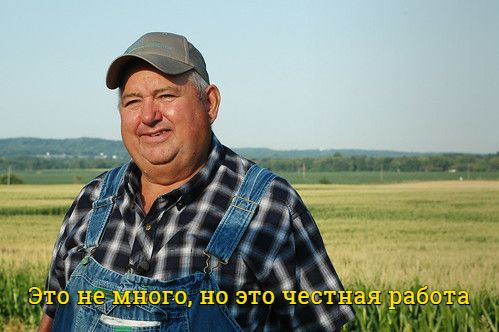